# EDA

Hello ,this is a notebook for analysing the results.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')

df

,id_test,function_name,array_length,comparison,time,space
0,0,sequantial_search,1000,1000,0.210697,0.00000
1,0,advanced_sequantial_search,1000,1662,0.208243,0.00000
2,0,binary_search,1000,28,0.206580,0.03125
3,1,sequantial_search,1000,1000,0.204361,0.00000
4,1,advanced_sequantial_search,1000,1660,0.209920,0.00000
...,...,...,...,...,...,...
745,248,advanced_sequantial_search,981000,744022,0.275755,0.00000
746,248,binary_search,981000,58,0.208878,0.00000
747,249,sequantial_search,981000,708105,0.295866,0.00000
748,249,advanced_sequantial_search,981000,1416209,0.360223,0.00000


In [2]:
group_columns = ['function_name', 'array_length']
cal_columns = ['comparison', 'time','space']


In [3]:
group_df = df.groupby(group_columns,as_index=False).mean()

In [4]:
calculated_results = group_df[group_columns+cal_columns]

calculated_results

,function_name,array_length,comparison,time,space
0,advanced_sequantial_search,1000,1548.8,0.208875,0.000000
1,advanced_sequantial_search,21000,25384.4,0.214027,-9.153125
2,advanced_sequantial_search,41000,47461.4,0.222127,0.000000
3,advanced_sequantial_search,61000,69104.4,0.225594,0.000000
4,advanced_sequantial_search,81000,87644.2,0.227746,0.000000
...,...,...,...,...,...
145,sequantial_search,901000,855709.6,0.302392,0.000000
146,sequantial_search,921000,867328.0,0.303429,0.000000
147,sequantial_search,941000,897293.6,0.311865,0.000000
148,sequantial_search,961000,961000.0,0.313912,0.000000


In [5]:
function_names = list(calculated_results['function_name'].unique())
function_names

['advanced_sequantial_search', 'binary_search', 'sequantial_search']

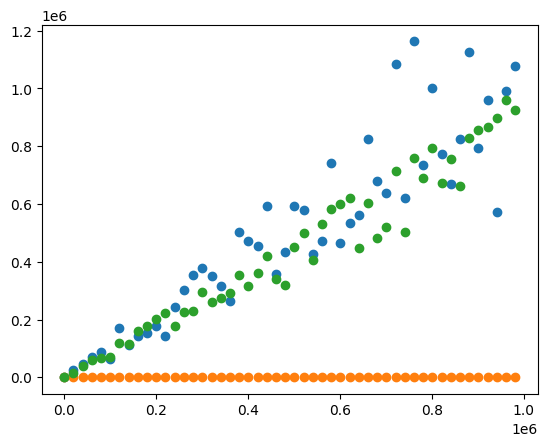

In [6]:
for function_name in function_names:
    df_plot = calculated_results[calculated_results['function_name'] == function_name]
    plt.scatter(df_plot['array_length'], df_plot['comparison'],label=function_name)



In [7]:
from complexity import get_complexity,leastSquares

algo_names = ['advanced_sequantial_search', 'binary_search', 'sequantial_search']
algo_name = 'binary_search'
df_plot = calculated_results[calculated_results['function_name'] == algo_name]

x_plot = df_plot['array_length']
y_plot = df_plot['comparison']

get_complexity(x_plot, y_plot)


'O(log2)'

In [8]:
import numpy as np
def _1(x):
    return np.ones(x.shape)

def n(x):
    return x

def n_2(x):
    return x**2

def n_3(x):
    return x**3

def log2(x):
    return np.log2(x)

def nlog2(x):
    return x * np.log2(x)


funcs = [_1,n,n_2,n_3,log2,nlog2]
complexity_names = ['O(1)','O(n)','O(n2)','O(n3)','O(log2)','O(nlog2)']


O(1) = 52.95199999999999 * _1
O(n) = 8.389712097810908e-05 * n
O(n2) = -0.00033481809632373265 * n_2
O(n3) = 120.75783927331368 * n_3
O(log2) = 2.8821072655159847 * log2
O(nlog2) = 4.2668304622041994e-06 * nlog2
O(log2)


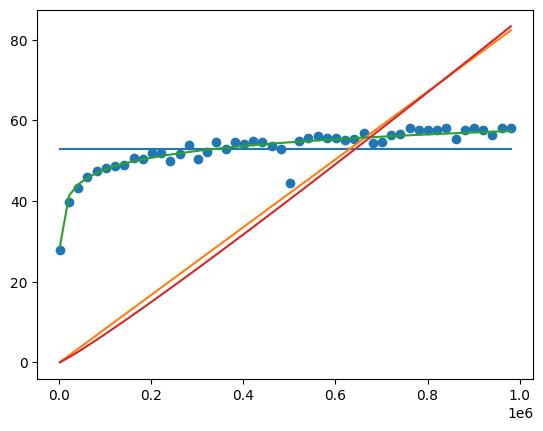

In [9]:
plt.scatter(x_plot, y_plot,label='data to fit')

best_fit = np.inf
best_complexity = ''
for func , name in zip(funcs,complexity_names): 
    new_fit , y_func ,coef = leastSquares(x_plot,y_plot,func)
    print(name , '=', coef ,'*', func.__name__ )
    if name != 'O(n3)' and name != 'O(n2)' :
        plt.plot(x_plot, y_func,label=name)
    if best_fit > new_fit:
        
        best_fit = new_fit
        best_complexity = name


print(best_complexity)


In [ ]:
print('goof job')